<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula10a_decision_tree_for_continous_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target

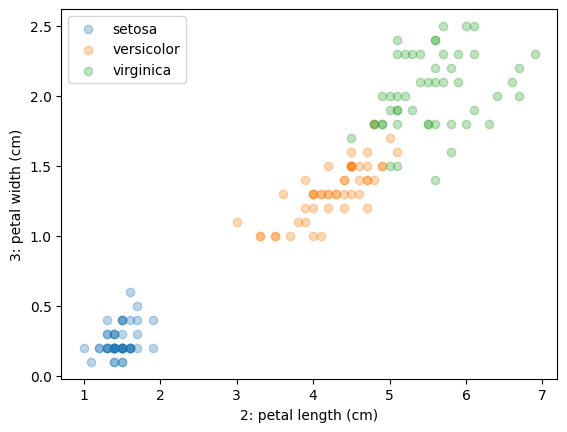

In [35]:
import matplotlib.pyplot as plt
i, j = 2, 3
def plot_features(i, j):
  plt.xlabel(f"{i}: {dataset.feature_names[i]}")
  plt.ylabel(f"{j}: {dataset.feature_names[j]}")
def plot_dataset(X, y):
  for k in set(y):
    plt.scatter(X[y == k, 0], X[y == k, 1], label=dataset.target_names[k], alpha=0.3)
plot_features(i, j)
plot_dataset(X[:,[i,j]], y)
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,[i,j]], y, test_size=0.2, random_state=42, stratify=y)

In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from collections import Counter

def most_common(lst):
  data = Counter(lst)
  return data.most_common(1)[0][0]

class ZeroR(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
      self.answer = most_common(y)
      return self
    def predict(self, X):
      return [self.answer] * len(X)

model = ZeroR()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))

0.3333333333333333


In [26]:
import numpy as np

class DecisionTree(BaseEstimator, ClassifierMixin):
  def __init__(self, feature=0):
    self.feature = feature

  def fit(self, X, y):
    self.value = np.mean(X[:, self.feature])
    greater_values = X[:, self.feature] >= self.value
    if sum(greater_values)>0 and sum(~greater_values)>0:
      self.greaters = DecisionTree(feature=self.feature).fit(X[greater_values], y[greater_values])
      self.lessers = DecisionTree(feature=self.feature).fit(X[~greater_values], y[~greater_values])
    else:
      self.answer = most_common(y)
      self.n_samples = len(y)
    return self

  def predict(self, X):
    if hasattr(self, 'answer'):
      return np.array([self.answer] * len(X))
    else:
      greater_values = X[:, self.feature] >= self.value
      return np.where(greater_values, self.greaters.predict(X), self.lessers.predict(X))

model = DecisionTree()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9


In [27]:
def define_axes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

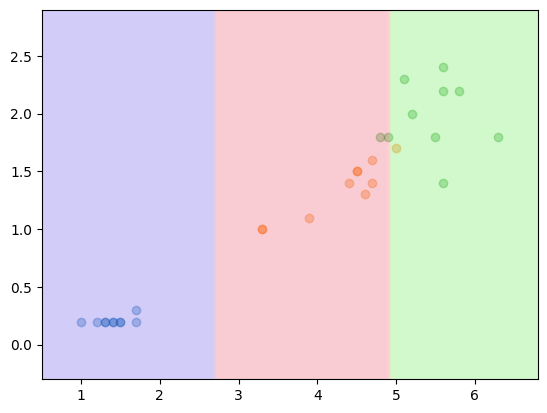

In [28]:
plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()

In [30]:
def print_tree(tree, depth=0):
  if hasattr(tree, 'answer'):
    print('\t' * depth, f"answer: {tree.answer} ({tree.n_samples})")
  else:
    print('\t' * depth, f"value: {tree.value}")
    print_tree(tree.greaters, depth+1)
    print_tree(tree.lessers, depth+1)

print_tree(model)

 value: 3.77
	 value: 5.013333333333333
		 value: 5.711764705882352
			 value: 6.214285714285715
				 value: 6.660000000000001
					 value: 6.766666666666667
						 answer: 2 (1)
						 answer: 2 (2)
					 value: 6.5
						 answer: 2 (1)
						 answer: 2 (1)
				 value: 5.966666666666666
					 value: 6.06
						 answer: 2 (3)
						 answer: 2 (2)
					 value: 5.85
						 answer: 2 (2)
						 answer: 2 (2)
			 value: 5.359999999999999
				 value: 5.57
					 value: 5.6499999999999995
						 answer: 2 (3)
						 answer: 2 (3)
					 value: 5.45
						 answer: 2 (2)
						 answer: 2 (2)
				 value: 5.15
					 value: 5.266666666666667
						 answer: 2 (2)
						 answer: 2 (1)
					 answer: 2 (7)
		 value: 4.434146341463415
			 value: 4.7285714285714295
				 value: 4.9
					 value: 4.942857142857143
						 answer: 2 (3)
						 answer: 1 (4)
					 answer: 1 (3)
				 value: 4.572727272727274
					 value: 4.66
						 answer: 1 (3)
						 answer: 1 (2)
					 answer: 1 (6)
			 value: 4.125
				 va

0.9333333333333333


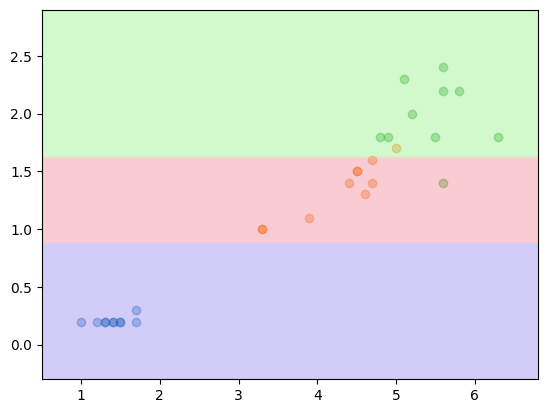

In [31]:
model = DecisionTree(1)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))
plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()

In [32]:
print_tree(model)

 value: 1.2049999999999998
	 value: 1.7823529411764707
		 value: 2.083783783783783
			 value: 2.2736842105263158
				 value: 2.3666666666666667
					 value: 2.46
						 answer: 2 (3)
						 answer: 2 (2)
					 answer: 2 (7)
				 value: 2.1142857142857143
					 answer: 2 (1)
					 answer: 2 (6)
			 value: 1.8833333333333329
				 value: 1.95
					 answer: 2 (5)
					 answer: 2 (5)
				 answer: 2 (8)
		 value: 1.42258064516129
			 value: 1.5357142857142858
				 value: 1.625
					 answer: 2 (1)
					 answer: 1 (3)
				 answer: 1 (10)
			 value: 1.3294117647058825
				 answer: 1 (5)
				 answer: 1 (12)
	 value: 0.45000000000000007
		 value: 1.0214285714285714
			 value: 1.1714285714285713
				 answer: 1 (5)
				 answer: 1 (2)
			 value: 0.8714285714285713
				 answer: 1 (5)
				 value: 0.55
					 answer: 0 (1)
					 answer: 0 (1)
		 value: 0.2394736842105262
			 value: 0.3538461538461538
				 answer: 0 (7)
				 answer: 0 (6)
			 value: 0.18000000000000005
				 answer: 0 (20)
				 answer: 0 

In [40]:
def gini(y):
  label = np.unique(y)
  aux = 0
  for l in label:
    p = np.mean(y==l)
    aux += p**2
  return 1-aux

print(gini(y_train))

0.6666666666666667


In [43]:
def impurity_value(y, x, value, impurity_function=gini):
  greater_values = x >= value
  imp_greaters = impurity_function(y[greater_values])
  imp_lessers = impurity_function(y[~greater_values])
  return imp_lessers * (sum(~greater_values)/len(y)) + \
         imp_greaters * (sum(greater_values)/len(y))

print(impurity_value(y_train, X_train[:, 0], 3.5))

0.34537408665225894


In [44]:
def best_split(x, y, impurity_function=gini):
  sx = sorted(x)
  best_imp = 1
  best_value = sx[0]
  for i in range(len(sx)-1):
    value = (sx[i]+sx[i+1])/2
    imp = impurity_value(y, x, value, impurity_function=impurity_function)
    if imp < best_imp:
      best_imp = imp
      best_value = value
  return best_value, best_imp

print(best_split(X_train[:, 0], y_train))

(np.float64(2.45), np.float64(0.3333333333333333))


In [45]:
def best_feature(X, y, impurity_function=gini):
  best_imp = 1
  best_feature = 0
  best_value = 0
  for i in range(X.shape[1]):
    value, imp = best_split(X[:, i], y, impurity_function=impurity_function)
    if imp < best_imp:
      best_imp = imp
      best_feature = i
      best_value = value
  return best_feature, best_value, best_imp

print(best_feature(X_train, y_train))

(0, np.float64(2.45), np.float64(0.3333333333333333))


0.9333333333333333


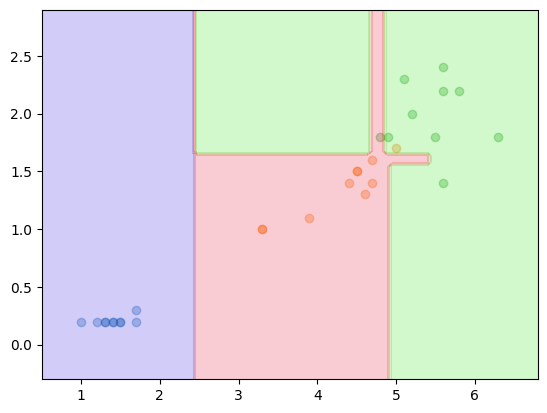

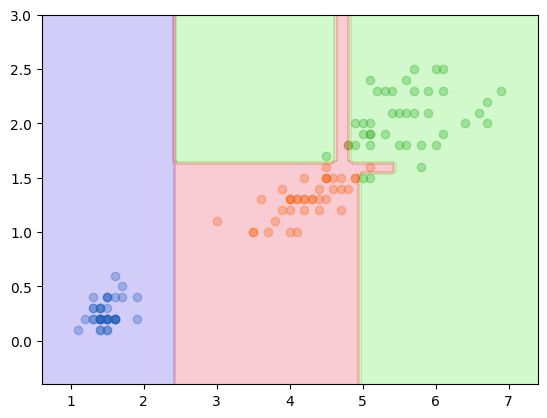

 value: 2.45
	 value: 1.65
		 value: 4.85
			 answer: 2 (35)
			 value: 4.65
				 answer: 1 (2)
				 answer: 2 (1)
		 value: 4.95
			 value: 1.55
				 value: 5.449999999999999
					 answer: 2 (1)
					 answer: 1 (1)
				 value: 5.05
					 answer: 2 (1)
					 answer: 2 (1)
			 value: 3.25
				 answer: 1 (37)
				 answer: 1 (1)
	 value: 1.15
		 value: 1.25
			 answer: 0 (38)
			 answer: 0 (1)
		 answer: 0 (1)


In [54]:
class DecisionTree(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.feature, self.value, _ = best_feature(X, y)
    greater_values = X[:, self.feature] >= self.value
    if sum(greater_values)>0 and sum(~greater_values)>0:
      self.greaters = DecisionTree().fit(X[greater_values], y[greater_values])
      self.lessers = DecisionTree().fit(X[~greater_values], y[~greater_values])
    else:
      self.answer = most_common(y)
      self.n_samples = len(y)
    return self

  def predict(self, X):
    if hasattr(self, 'answer'):
      return np.array([self.answer] * len(X))
    else:
      greater_values = X[:, self.feature] >= self.value
      return np.where(greater_values, self.greaters.predict(X), self.lessers.predict(X))

model = DecisionTree()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))
plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()
plot_dataset(X_train, y_train)
plot_predictions(model, X_train)
plt.show()
print_tree(model)

0.9666666666666667


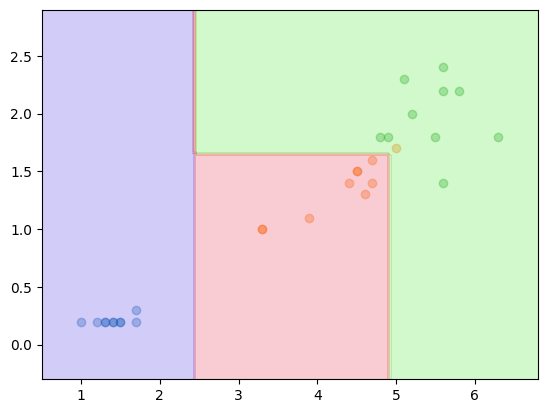

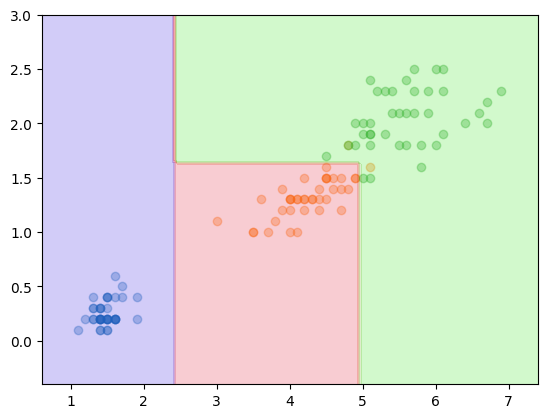

 value: 2.45
	 value: 1.65
		 value: 4.85
			 answer: 2 (35)
			 answer: 2 (3)
		 value: 4.95
			 answer: 2 (4)
			 answer: 1 (38)
	 answer: 0 (40)


In [55]:
class DecisionTree(BaseEstimator, ClassifierMixin):
  def __init__(self, max_depth=10, min_samples_split=2):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split

  def fit(self, X, y):
    self.feature, self.value, _ = best_feature(X, y)
    greater_values = X[:, self.feature] >= self.value
    if sum(greater_values)>self.min_samples_split and \
       sum(~greater_values)>self.min_samples_split and \
       self.max_depth > 0:
      self.greaters = DecisionTree(max_depth=self.max_depth-1, \
                                   min_samples_split=self.min_samples_split \
                                   ).fit(X[greater_values], y[greater_values])
      self.lessers  = DecisionTree(max_depth=self.max_depth-1, \
                                   min_samples_split=self.min_samples_split \
                                   ).fit(X[~greater_values], y[~greater_values])
    else:
      self.answer = most_common(y)
      self.n_samples = len(y)
    return self

  def predict(self, X):
    if hasattr(self, 'answer'):
      return np.array([self.answer] * len(X))
    else:
      greater_values = X[:, self.feature] >= self.value
      return np.where(greater_values, self.greaters.predict(X), self.lessers.predict(X))

model = DecisionTree(min_samples_split=2)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))
plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()
plot_dataset(X_train, y_train)
plot_predictions(model, X_train)
plt.show()
print_tree(model)

0.9333333333333333


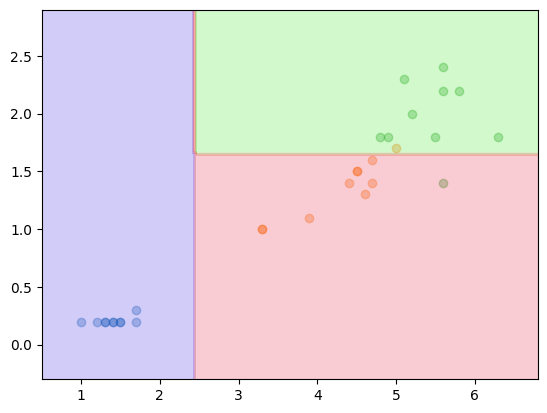

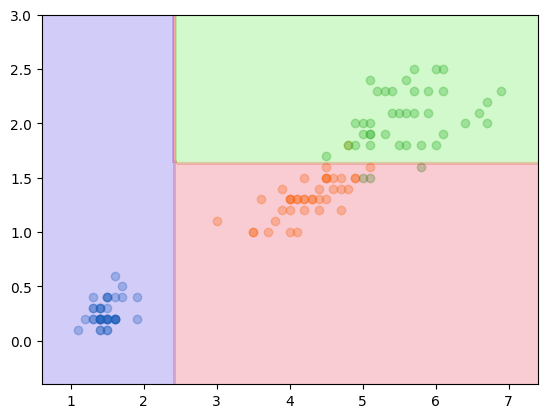

 value: 2.45
	 value: 1.65
		 answer: 2 (38)
		 answer: 1 (42)
	 answer: 0 (40)


In [53]:
model = DecisionTree(max_depth=2)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))
plot_dataset(X_test, y_test)
plot_predictions(model, X_test)
plt.show()
plot_dataset(X_train, y_train)
plot_predictions(model, X_train)
plt.show()
print_tree(model)

In [65]:
from sklearn.model_selection import cross_validate, KFold

scores = cross_validate(DecisionTree(), X, y, cv=KFold(n_splits=5, shuffle=True))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.93333333 0.96666667 1.         0.93333333 0.93333333]
0.9533333333333334


In [67]:
!pip install optuna -qq

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
import optuna

def objective(trial):
  # Define hyperparameters to tune
  max_depth = trial.suggest_int('max_depth', 1, 10)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

  # Create and train the DecisionTree model
  model = DecisionTree(max_depth=max_depth, min_samples_split=min_samples_split)
  scores = cross_validate(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True))

  # Return the mean test score
  return np.mean(scores['test_score'])

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters and best score
print("Best parameters found by Optuna:")
print(study.best_params)
print("Best accuracy score:")
print(study.best_value)

[I 2025-09-19 13:41:54,422] A new study created in memory with name: no-name-1ed20ea9-7a2b-409a-a178-fca0d0eab356
[I 2025-09-19 13:41:54,955] Trial 0 finished with value: 0.925 and parameters: {'max_depth': 8, 'min_samples_split': 18}. Best is trial 0 with value: 0.925.
[I 2025-09-19 13:41:55,565] Trial 1 finished with value: 0.925 and parameters: {'max_depth': 6, 'min_samples_split': 19}. Best is trial 0 with value: 0.925.
[I 2025-09-19 13:41:56,171] Trial 2 finished with value: 0.9333333333333333 and parameters: {'max_depth': 5, 'min_samples_split': 5}. Best is trial 2 with value: 0.9333333333333333.
[I 2025-09-19 13:41:56,716] Trial 3 finished with value: 0.9166666666666667 and parameters: {'max_depth': 10, 'min_samples_split': 12}. Best is trial 2 with value: 0.9333333333333333.
[I 2025-09-19 13:41:57,110] Trial 4 finished with value: 0.5916666666666666 and parameters: {'max_depth': 1, 'min_samples_split': 13}. Best is trial 2 with value: 0.9333333333333333.
[I 2025-09-19 13:41:57,

Best parameters found by Optuna:
{'max_depth': 7, 'min_samples_split': 16}
Best accuracy score:
0.95


In [72]:
model = DecisionTree(**study.best_params)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9333333333333333
